# Walmart Sales Forecasting

## Table of Contents

1. [Import Packages](#Import_Packages)<br>
2. [Data Wrangling](#Data_Wrangling)<br>
    2.1 [Importing Files](#Importing_Files)<br>
    2.2 [Data Cleaning and Initial Analysis](#Data_Cleaning_and_Initial_Analysis)<br>
    2.3 [Data Merging](#Data_Merging)<br>
    2.4 [Null Handling](#Null_Handling)<br>
    2.5 [Datatype Handling](#Datatype_Handling)<br>
    2.6 [Name it "df"](#Name_it_df)<br>
3. [Exploratory Data Analysis](#Exploratory_Data_Analysis)<br>
    3.1 [Data Visualization](#Data_Visualization)<br>
4. [Preprocessing and Training Data Development](#Preprocessing_and_Training_Data_Development)<br>
    4.1 [Preprocessing](#Preprocessing)<br>

<a id='Import_Packages'></a>
## 1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

<a id='Data_Wrangling'></a>
## 2. Data Wrangling

<a id='Importing_Files'></a>
### 2.1 Importing Files

In [3]:
# Import the file: walmart_features
features_file_path = r'C:\Users\Noah\Desktop\GitHub\Springboard\Capstone Projects\Capstone_2_WalmartSalesForecasting\walmart_data\walmart_features.csv'
features_df = pd.read_csv(features_file_path, parse_dates=['Date'])

In [4]:
# Import the file: walmart_stores
stores_file_path = r'C:\Users\Noah\Desktop\GitHub\Springboard\Capstone Projects\Capstone_2_WalmartSalesForecasting\walmart_data\walmart_stores.csv'
stores_df = pd.read_csv(stores_file_path)

In [5]:
# Import the file: walmart_data
data_file_path = r'C:\Users\Noah\Desktop\GitHub\Springboard\Capstone Projects\Capstone_2_WalmartSalesForecasting\walmart_data\walmart_train.csv'
data_df = file = pd.read_csv(data_file_path, parse_dates=['Date'])

#### Create a holidays dataframe for later use (maybe)

In [6]:
holidays_dict = {
    'Super Bowl':['12-Feb-10','11-Feb-11','10-Feb-12','8-Feb-13'],
    'Labor Day':['10-Sep-10','9-Sep-11','7-Sep-12','6-Sep-13'],
    'Thanksgiving':['26-Nov-10','25-Nov-11','23-Nov-12','29-Nov-13'],
    'Christmas':['31-Dec-10','30-Dec-11','28-Dec-12','27-Dec-13']
    }

holidays_df = pd.DataFrame(holidays_dict, dtype='datetime64[ns]')
holidays_df

,Super Bowl,Labor Day,Thanksgiving,Christmas
0,2010-02-12,2010-09-10,2010-11-26,2010-12-31
1,2011-02-11,2011-09-09,2011-11-25,2011-12-30
2,2012-02-10,2012-09-07,2012-11-23,2012-12-28
3,2013-02-08,2013-09-06,2013-11-29,2013-12-27


<a id='Data_Cleaning_and_Initial_Analysis'></a>
### 2.2 Data Cleaning and Initial Analysis

#### "Data" Dataset

In [7]:
data_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [9]:
# What years are present in 'data'?
data_df['Date'].dt.year.unique()

array([2010, 2011, 2012], dtype=int64)

In [10]:
data_df['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [11]:
data_df['Dept'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

#### "Stores" Dataset

In [12]:
stores_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [13]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [14]:
# What are the simple statistics of these stores' sizes, grouped by type?
stores_df.groupby('Type')['Size'].describe()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.727273,49392.621098,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.705882,32371.137916,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.666667,1304.145033,39690.0,39745.00,39910.0,40774.0,42988.0


#### "Features" Dataset

In [15]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [16]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [17]:
# What years are covered by the "features" file?
features_df.Date.dt.year.unique().tolist()

[2010, 2011, 2012, 2013]

In [18]:
# Many of the markdown columns are null, this is likely because there are simply not markdowns applied to these dates.
# Let's see some observations of MarkDown1 which aren't null.
features_df[features_df.MarkDown1.notnull()].head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,2011-11-18,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,2011-11-25,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,2011-12-02,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,2011-12-09,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False


In [19]:
# Let's look at null CPI observations in context.
features_df[features_df['CPI'].isnull()].head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
169,1,2013-05-03,66.66,3.386,2298.63,2.00,129.90,55.46,1301.04,NaN,NaN,False
170,1,2013-05-10,63.90,3.392,4624.61,83.88,42.38,1618.31,8144.90,NaN,NaN,False
171,1,2013-05-17,69.53,3.454,16170.50,92.00,8.32,4127.24,6206.97,NaN,NaN,False
172,1,2013-05-24,77.19,3.494,7959.89,178.00,1621.47,3152.57,2938.70,NaN,NaN,False
173,1,2013-05-31,78.02,3.466,2369.77,142.45,475.35,45.55,2056.84,NaN,NaN,False


There are many null values, however, they all occur within "Markdown" columns. It seems I should leave these alone as only rows with markdown events occurring within them have their respective markdowns.

<a id='Data_Merging'></a>
### 2.3 Data Merging

Now all of the datasets have been cleaned and an initial analysis has been made.

It seems potentially useful features for predicting store-department-date sales (that's the grouping for the desired predicition; it's odd to read, I agree) are separated between these dataframes.

Let's merge them together.

In [20]:
print(data_df.columns.tolist())
print(stores_df.columns.tolist())
print(features_df.columns.tolist())

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']
['Store', 'Type', 'Size']
['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']


In [21]:
# Check the shapes of the datasets before merging, to make sure that data isn't lost
print(data_df.shape)
print(stores_df.shape)
print(features_df.shape)

(421570, 5)
(45, 3)
(8190, 12)


In [22]:
# Let's start by inner joining the stores dataset onto data dataset
merged_data = data_df.merge(stores_df)
merged_data.shape

(421570, 7)

In [23]:
# Looks like nothing was lost, the same amount of observations remain and the features increased by the correct amount
merged_data = merged_data.merge(features_df)
merged_data.shape

(421570, 16)

In [24]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421

Again, nothing was lost and the new features were added. Great!

<a id='Null_Handling'></a>
### 2.4 Null Handling

In [25]:
# Find columns which have any null values
null_columns = merged_data.columns[merged_data.isna().any()].tolist()
null_columns

['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

Since these are all markdowns, and we can infer that null values imply a markdown of "$0", I'll impute the nulls with 0

In [26]:
# Impute the null columns with 0s and convert them to ints
for column in null_columns: merged_data[column].fillna(value=0, inplace=True)
for column in null_columns: merged_data[column] = merged_data[column].astype(int)
    
merged_data[null_columns].isna().sum()

MarkDown1    0
MarkDown2    0
MarkDown3    0
MarkDown4    0
MarkDown5    0
dtype: int64

<a id='Datatype_Handling'></a>
### 2.5 Datatype Handling

Let's check the datatypes to see if they're in their most useful forms

In [27]:
merged_data.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Type                    object
Size                     int64
Temperature            float64
Fuel_Price             float64
MarkDown1                int32
MarkDown2                int32
MarkDown3                int32
MarkDown4                int32
MarkDown5                int32
CPI                    float64
Unemployment           float64
dtype: object

In [28]:
# Looks like Store and Department are int, let's change them to category
merged_data['Store'] = merged_data['Store'].astype('category')
merged_data['Dept'] = merged_data['Dept'].astype('category')

merged_data[['Store','Dept']].dtypes

Store    category
Dept     category
dtype: object

<a id='Name_it_df'></a>
### 2.6 Name it "df"

In [29]:
df = merged_data

In [30]:
# Is df just a pointer to merged_data?
df is merged_data

True

<a id='Exploratory_Data_Analysis'></a>
## 3. Exploratory Data Analysis

<a id='Data_Visualization'></a>
### 3.1 Data Visualization

#### Correlations

In [31]:
# Define a function to generate a features correlations heatmap
def gen_corr_heatmap(dataframe, mask=True, annot=False, title=None):
    plt.figure(figsize=(10,8))
    sns.set(font_scale=1)
    
    if mask == True:
        mask= np.zeros_like(dataframe.corr())
        mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style('white'):
        sns.heatmap(dataframe.corr(), vmin=-1, vmax=1, mask=mask, center=0, annot=annot, cmap='bwr')
        
    if title: plt.title(f'\n{title}\n', fontsize=18)
    
    plt.show()
    
    return

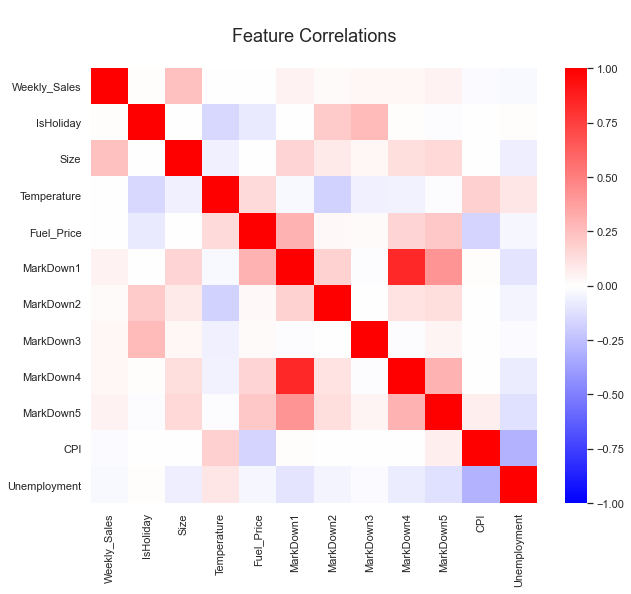

In [32]:
gen_corr_heatmap(df, mask=False, title='Feature Correlations')

Overall there aren't very high correlations, but notable correlations are:

- MarkDown1 with MarkDown4, though that's (probably) not useful
- IsHoliday with MarkDown3

Let's focus on the target feature: Weekly_Sales

In [33]:
# Define a function to generate a correlation heatmap between the target feature and other features
def gen_corr_to_target(dataframe, target, annot=False, title=None):
    plt.figure(figsize=(4,6))
    sns.set(font_scale=1)
    
    sns.heatmap(dataframe.corr()[[target]].sort_values(target, ascending=False)[1:], vmin=-1, vmax=1, \
                center=0, annot=annot, cmap='bwr')
    
    if title: plt.title(f'\n{title}\n', fontsize=18)
    
    plt.show()
    
    return

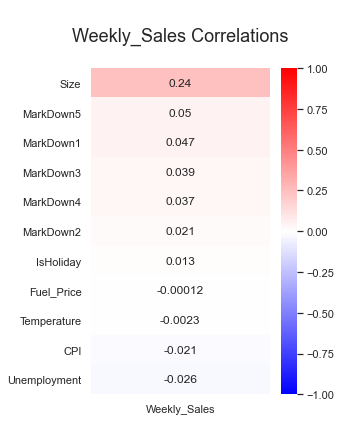

In [34]:
gen_corr_to_target(dataframe=df, target='Weekly_Sales', annot=True, title='Weekly_Sales Correlations')

Here we can focus in on the important correlations, but none are very high correlations.

We haven't yet visualized the correlation of Weekly_Sales and Date yet, let's see that.

#### Weekly Sales

In [35]:
# Create a DataFrame to visualize the year vs. Weekly_Sales vs. [time-period].
date_vs_weeklySales = pd.DataFrame()
date_vs_weeklySales['Weekly_Sales'] = df.Weekly_Sales
date_vs_weeklySales['Year'] = df.Date.dt.isocalendar().year
date_vs_weeklySales['Week'] = df.Date.dt.isocalendar().week

date_vs_weeklySales.head()

,Weekly_Sales,Year,Week
0,24924.50,2010,5
1,50605.27,2010,5
2,13740.12,2010,5
3,39954.04,2010,5
4,32229.38,2010,5


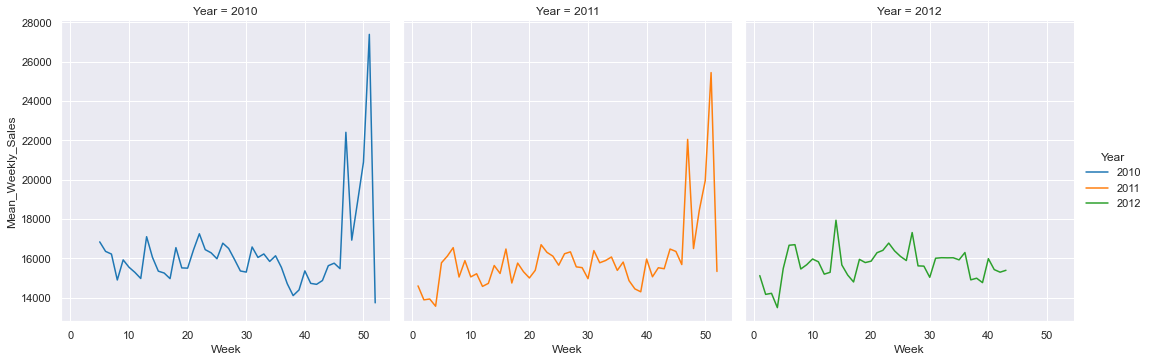

In [36]:
# Plot mean weekly sales vs. week per year
mean_plot_data = date_vs_weeklySales.groupby(['Year','Week']).mean()
mean_plot_data = mean_plot_data.reset_index().rename({'Weekly_Sales':'Mean_Weekly_Sales'}, axis=1)

sns.relplot(data=mean_plot_data, x='Week', y='Mean_Weekly_Sales', col='Year', hue='Year', palette='tab10', kind='line');

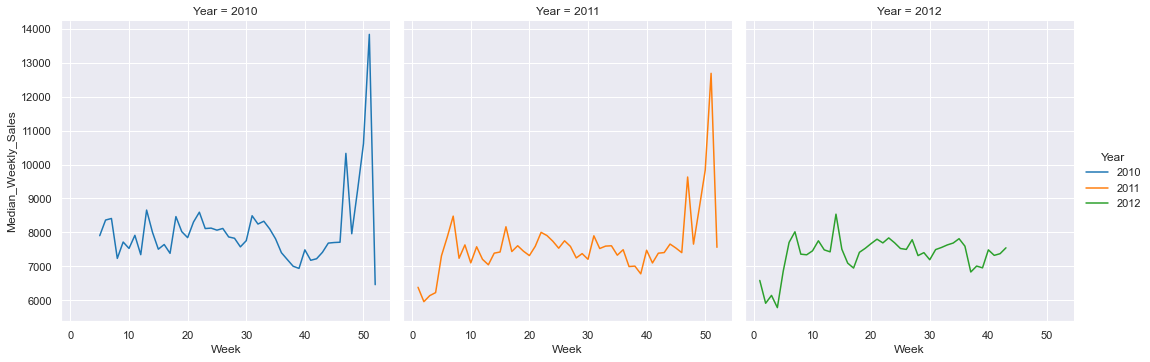

In [37]:
# Plot median weekly sales vs. week per year
median_plot_data = date_vs_weeklySales.groupby(['Year','Week']).median()
median_plot_data = median_plot_data.reset_index().rename({'Weekly_Sales':'Median_Weekly_Sales'}, axis=1)

sns.relplot(data=median_plot_data, x='Week', y='Median_Weekly_Sales', col='Year', hue='Year', palette='tab10', kind='line');

#### Histograms

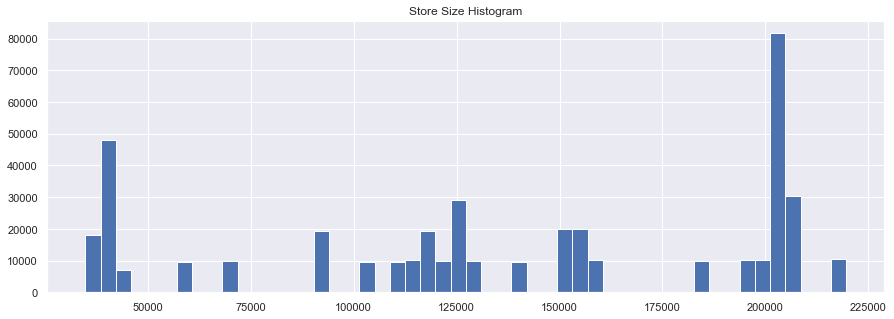

In [38]:
df['Size'].hist(bins=50, figsize=[15,5])
plt.title('Store Size Histogram');

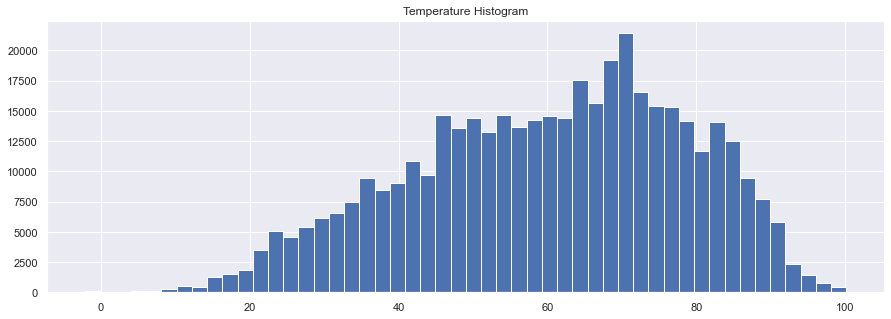

In [39]:
df['Temperature'].hist(bins=50, figsize=[15,5])
plt.title('Temperature Histogram');

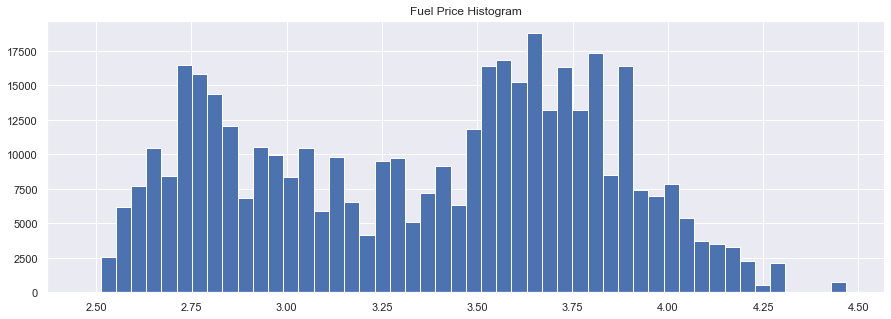

In [40]:
df['Fuel_Price'].hist(bins=50, figsize=[15,5])
plt.title('Fuel Price Histogram');

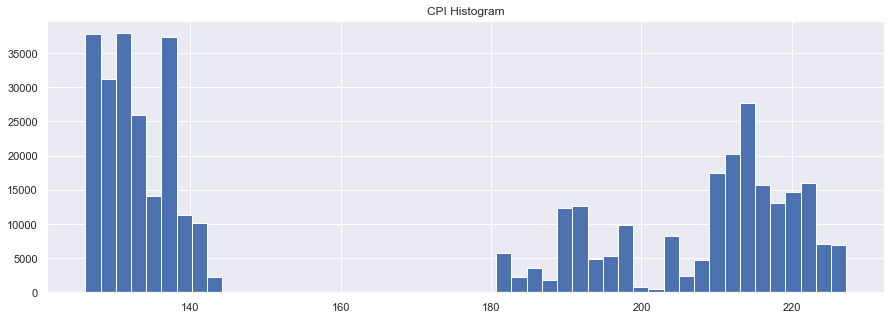

In [41]:
df['CPI'].hist(bins=50, figsize=[15,5])
plt.title('CPI Histogram');

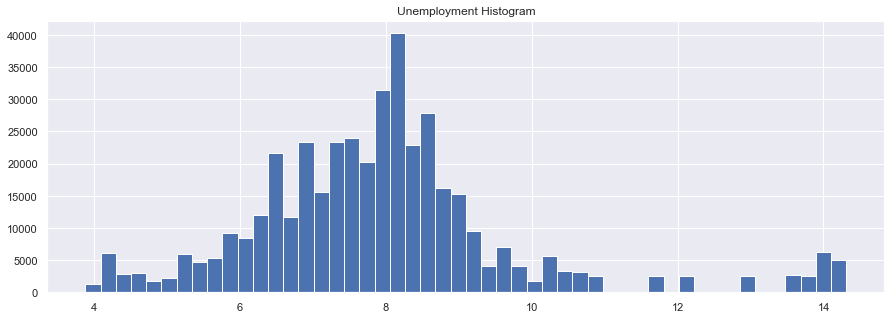

In [42]:
df['Unemployment'].hist(bins=50, figsize=[15,5])
plt.title('Unemployment Histogram');

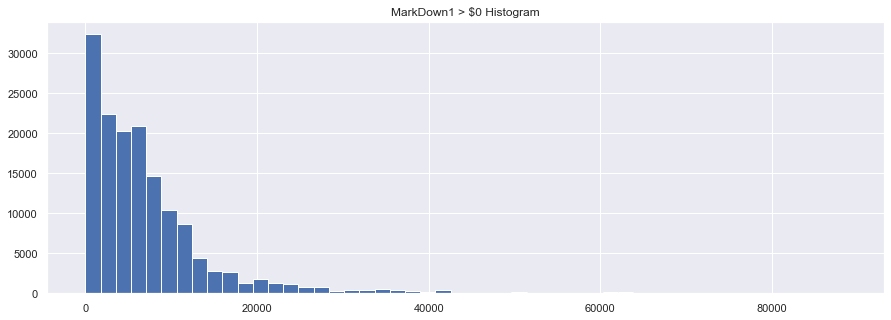

In [43]:
df['MarkDown1'][df['MarkDown1'] > 0].hist(bins=50, figsize=[15,5])
plt.title('MarkDown1 > $0 Histogram');

<a id='Preprocessing_and_Training_Data_Development'></a>
## 4. Preprocessing and Training Data Development

<a id='Preprocessing'></a>
### 4.1 Preprocessing